<a href="https://colab.research.google.com/github/nizarihsan/PCD/blob/main/Deteksi_Tepi_dengan_Sobel%2C_Prewitt%2C_Roberts%2C_dan_Canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving pexels-pixabay-290275.jpg to pexels-pixabay-290275.jpg


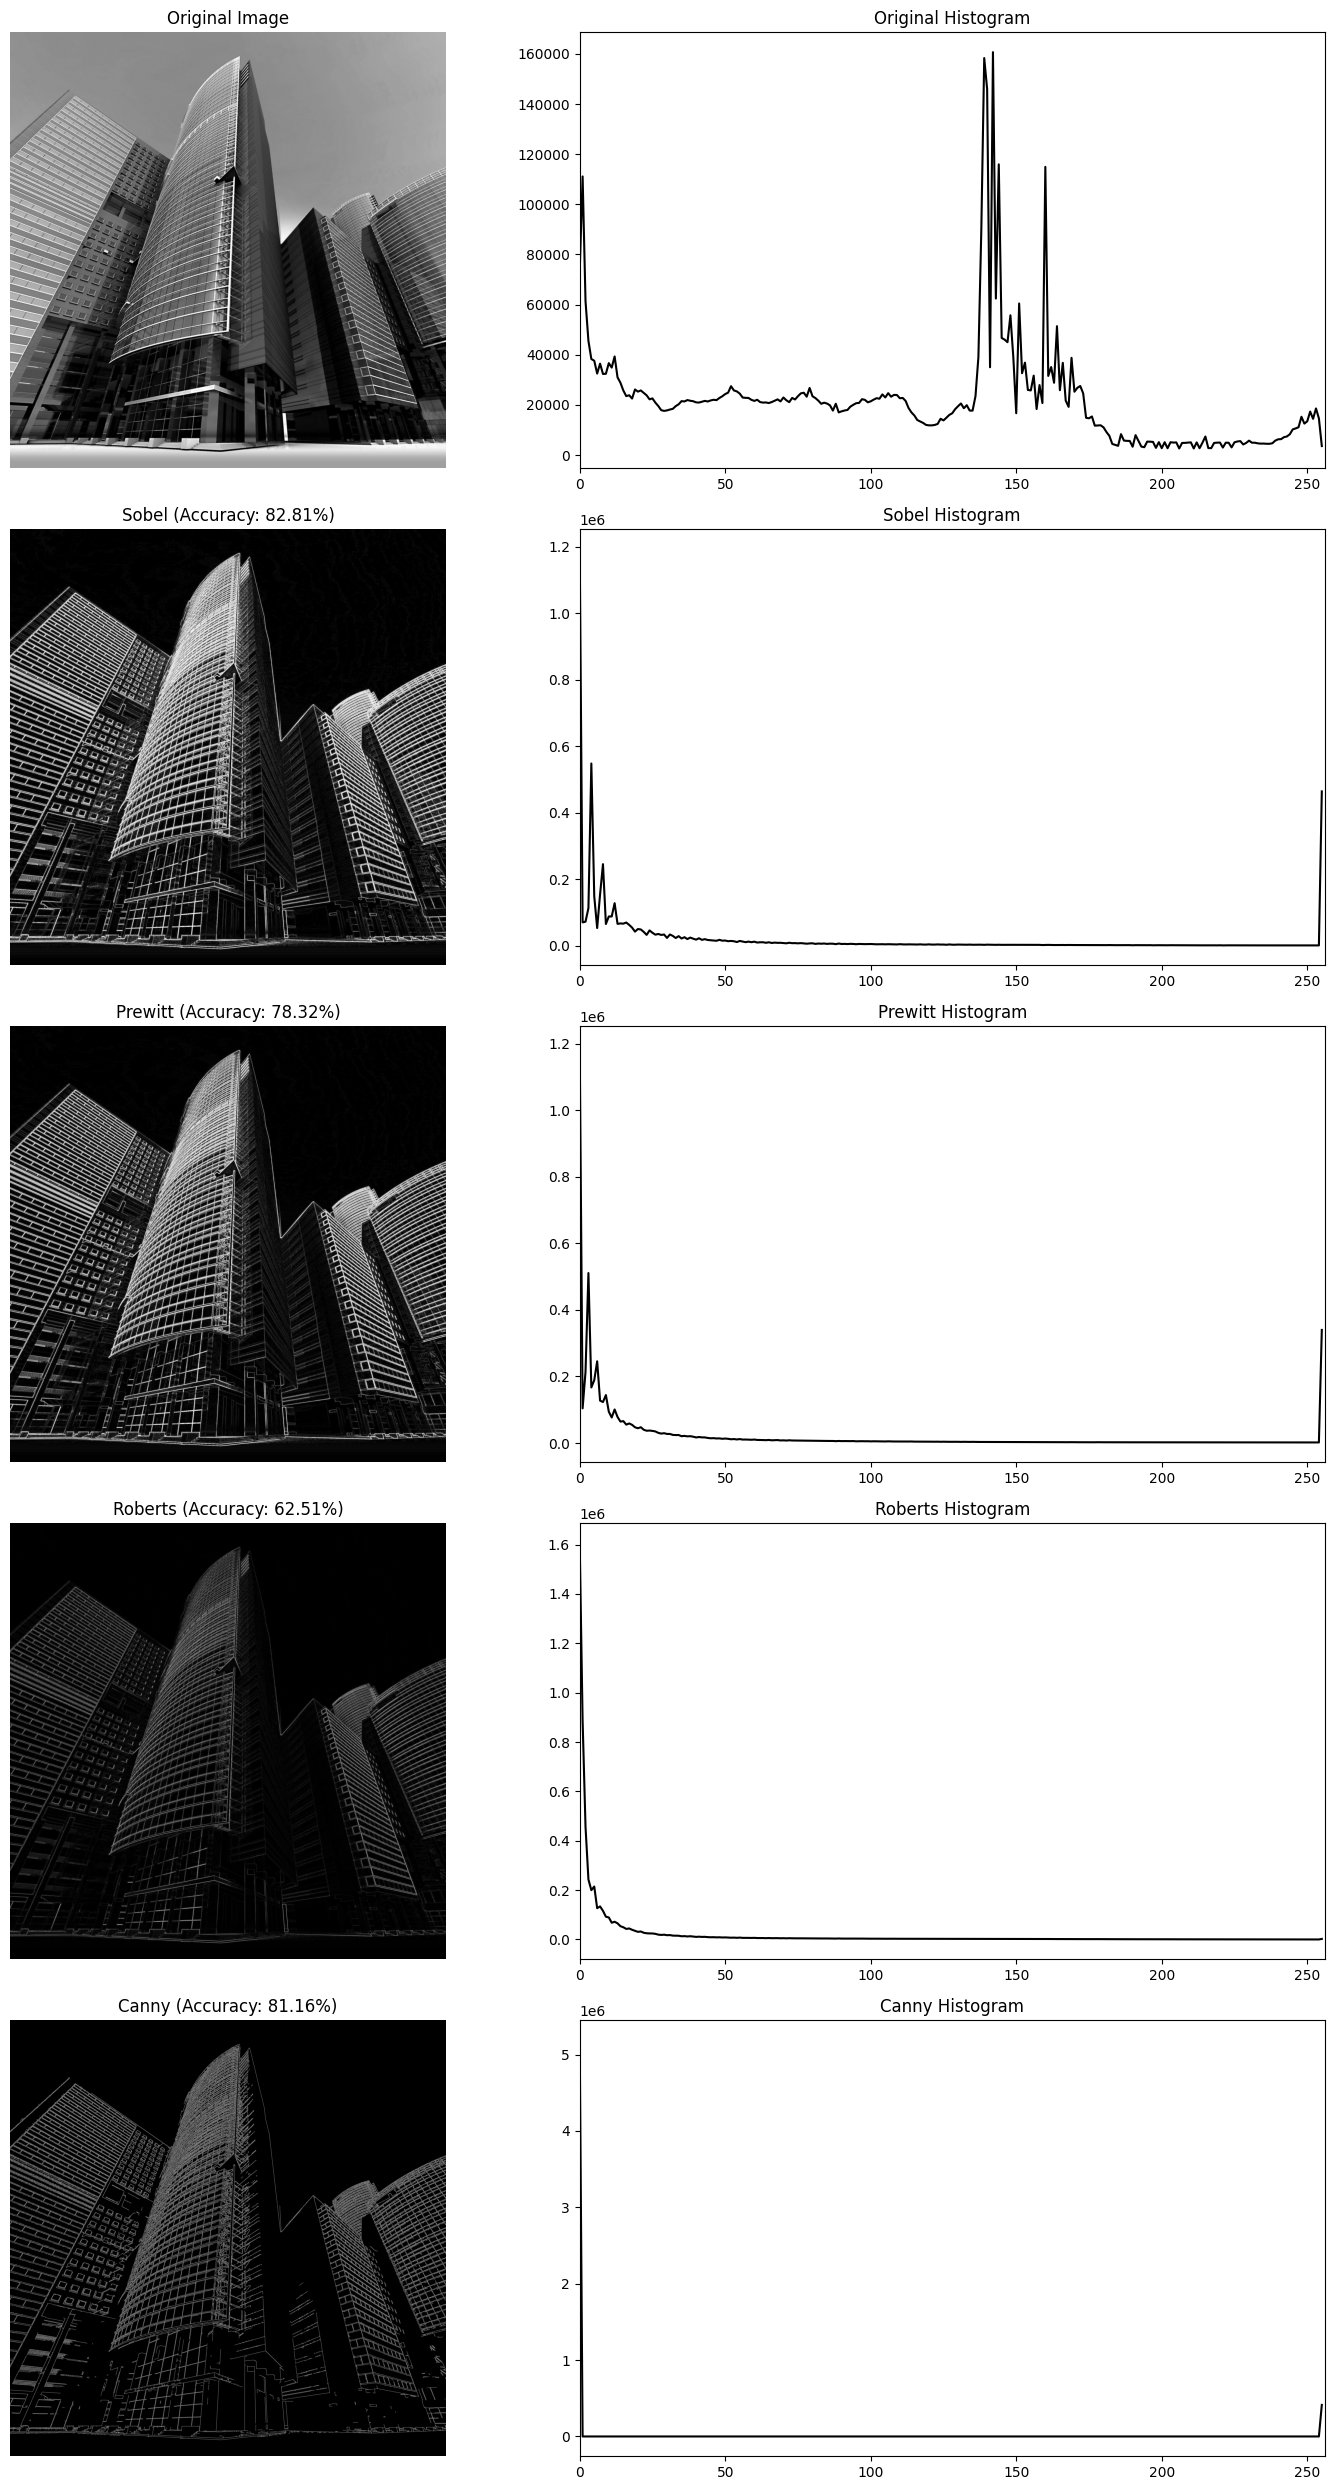

In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

def edge_detection(image: np.ndarray, method: str) -> np.ndarray:
    """
    Menerapkan metode deteksi tepi.
    """
    if method == "Sobel":
        sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        result = cv2.magnitude(sobelx, sobely)
    elif method == "Prewitt":
        kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
        kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)
        prewittx = cv2.filter2D(image, cv2.CV_32F, kernelx)
        prewitty = cv2.filter2D(image, cv2.CV_32F, kernely)
        result = cv2.magnitude(prewittx, prewitty)
    elif method == "Roberts":
        kernelx = np.array([[1, 0], [0, -1]], dtype=np.float32)
        kernely = np.array([[0, 1], [-1, 0]], dtype=np.float32)
        robertsx = cv2.filter2D(image, cv2.CV_32F, kernelx)
        robertsy = cv2.filter2D(image, cv2.CV_32F, kernely)
        result = cv2.magnitude(robertsx, robertsy)
    elif method == "Canny":
        result = cv2.Canny(image, 100, 200)
    else:
        raise ValueError(f"Metode deteksi tepi '{method}' tidak dikenal.")
    return np.uint8(np.clip(result, 0, 255))

def plot_histogram(image: np.ndarray, ax: plt.Axes, title: str):
    """
    Menampilkan histogram dari gambar.
    """
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    ax.plot(hist, color='black')
    ax.set_title(title)
    ax.set_xlim([0, 256])

def calculate_accuracy(edge_image: np.ndarray, ground_truth: np.ndarray) -> float:
    """
    Menghitung akurasi berdasarkan kemiripan histogram.
    """
    edge_hist = cv2.calcHist([edge_image], [0], None, [256], [0, 256]).flatten()
    ground_truth_hist = cv2.calcHist([ground_truth], [0], None, [256], [0, 256]).flatten()
    similarity = cv2.compareHist(edge_hist, ground_truth_hist, cv2.HISTCMP_CORREL)
    return round(similarity * 100, 2)

def process_image(image_path: str):
    """
    Proses utama untuk setiap gambar: deteksi tepi, akurasi, dan visualisasi.
    """
    # Memuat citra dan konversi ke grayscale
    original_image = Image.open(image_path)
    gray_image = np.array(original_image.convert('L'))

    # Threshold citra asli untuk dijadikan "ground truth"
    _, ground_truth = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Metode deteksi tepi yang tersedia
    methods = ["Sobel", "Prewitt", "Roberts", "Canny"]
    results = {}

    # Aplikasi setiap metode
    for method in methods:
        edge_result = edge_detection(gray_image, method)
        accuracy = calculate_accuracy(edge_result, ground_truth)
        results[method] = (edge_result, accuracy)

    # Visualisasi hasil
    fig, axes = plt.subplots(len(methods) + 1, 2, figsize=(15, 5 * (len(methods) + 1)))

    # Plot gambar asli
    axes[0, 0].imshow(gray_image, cmap='gray')
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis('off')
    plot_histogram(gray_image, axes[0, 1], "Original Histogram")

    # Plot setiap metode
    for i, method in enumerate(methods, start=1):
        edge_result, accuracy = results[method]
        axes[i, 0].imshow(edge_result, cmap='gray')
        axes[i, 0].set_title(f"{method} (Accuracy: {accuracy}%)")
        axes[i, 0].axis('off')
        plot_histogram(edge_result, axes[i, 1], f"{method} Histogram")

    plt.tight_layout()
    plt.show()

# Upload file menggunakan Google Colab
uploaded = files.upload()
for filename in uploaded.keys():
    process_image(filename)


### Deteksi Tepi dalam Pengolahan Citra

Deteksi tepi adalah teknik dalam pengolahan citra yang bertujuan untuk mendeteksi perubahan intensitas pada gambar yang mengindikasikan adanya tepi, seperti batas antara dua objek. Berikut adalah perbandingan antara metode **Sobel**, **Prewitt**, **Roberts**, dan **Canny**, termasuk tujuan serta keunggulan dan kelemahannya:

---

### **1. Sobel**
- **Deskripsi**: Metode berbasis konvolusi yang menggunakan dua kernel (untuk arah horizontal dan vertikal) untuk menghitung gradien intensitas.
- **Kernel**:
  ```
  G_x = [[-1, 0, 1],
         [-2, 0, 2],
         [-1, 0, 1]],
  G_y = [[-1, -2, -1],
         [ 0,  0,  0],
         [ 1,  2,  1]]
  ```
- **Kelebihan**:
  - Relatif sederhana dan cepat.
  - Menghasilkan tepi yang halus.
  - Lebih baik untuk menangkap tepi yang halus atau noise rendah.
- **Kekurangan**:
  - Sensitif terhadap noise.
  - Tidak seakurat metode seperti Canny.
- **Tujuan**: Deteksi tepi dasar, terutama pada citra dengan noise rendah.

---

### **2. Prewitt**
- **Deskripsi**: Serupa dengan Sobel, tetapi kernel Prewitt memiliki nilai konstan yang lebih sederhana.
- **Kernel**:
  ```
  G_x = [[-1, 0, 1],
         [-1, 0, 1],
         [-1, 0, 1]],
  G_y = [[-1, -1, -1],
         [ 0,  0,  0],
         [ 1,  1,  1]]
  ```
- **Kelebihan**:
  - Cepat dan sederhana.
  - Kurang sensitif terhadap noise dibanding Roberts.
- **Kekurangan**:
  - Akurasi lebih rendah dibanding Sobel.
  - Tidak optimal untuk citra dengan gradien kompleks.
- **Tujuan**: Alternatif sederhana untuk deteksi tepi pada gambar dasar.

---

### **3. Roberts**
- **Deskripsi**: Metode deteksi tepi yang menghitung gradien menggunakan perbedaan diagonal antara piksel.
- **Kernel**:
  ```
  G_x = [[ 1,  0],
         [ 0, -1]],
  G_y = [[ 0,  1],
         [-1,  0]]
  ```
- **Kelebihan**:
  - Baik untuk mendeteksi tepi yang sangat tajam.
  - Cepat karena menggunakan kernel kecil (2x2).
- **Kekurangan**:
  - Sangat sensitif terhadap noise.
  - Tidak cocok untuk citra dengan ukuran besar atau noise tinggi.
- **Tujuan**: Deteksi tepi dengan detail tinggi pada gambar yang tajam dan noise rendah.

---

### **4. Canny**
- **Deskripsi**: Metode multi-tahap yang menggabungkan smoothing, deteksi gradien, non-maximum suppression, dan thresholding ganda untuk deteksi tepi yang lebih akurat.
- **Tahapan**:
  1. Smoothing menggunakan Gaussian blur untuk mengurangi noise.
  2. Deteksi gradien dengan Sobel atau operator serupa.
  3. Non-maximum suppression untuk mempertahankan piksel dengan gradien maksimum.
  4. Thresholding ganda untuk menentukan tepi yang kuat dan lemah.
- **Kelebihan**:
  - Akurat dan tahan terhadap noise.
  - Menghasilkan tepi yang tipis dan terhubung.
- **Kekurangan**:
  - Relatif lebih lambat dibanding metode lain.
  - Membutuhkan parameter tuning (sigma, threshold).
- **Tujuan**: Deteksi tepi yang optimal pada gambar dengan noise.

---

### **Perbandingan Metode Deteksi Tepi**
| **Metode**   | **Langkah Utama**                              | **Keunggulan**                       | **Kelemahan**                            | **Tujuan Penggunaan**                 |
|--------------|-----------------------------------------------|--------------------------------------|------------------------------------------|---------------------------------------|
| **Sobel**    | Menggunakan kernel 3x3 untuk menghitung gradien. | Stabil, detail arah jelas.          | Kurang sensitif pada perubahan kecil.    | Deteksi tepi dasar yang halus.        |
| **Prewitt**  | Kernel sederhana untuk gradien horizontal/vertikal. | Cepat dan mudah diimplementasikan.  | Kurang akurat dibanding Sobel.           | Real-time aplikasi sederhana.         |
| **Roberts**  | Kernel 2x2 untuk perubahan intensitas kecil.   | Sensitif terhadap detail tajam.      | Noise sangat memengaruhi hasil.          | Deteksi tepi tajam atau lokal kecil.  |
| **Canny**    | Gaussian blur, gradien, dan threshold ganda.   | Akurasi tinggi, hasil bersih.       | Komputasi lebih lambat, parameter sensitif. | Gambar dengan detail halus/noise kecil.|

---

### **Kode Utama**

#### **1. `edge_detection(image, method)`**
- **Fungsi**: Melakukan deteksi tepi pada gambar berdasarkan metode yang dipilih.
- **Metode yang Didukung**:
  1. **Sobel**: Menghitung gradien intensitas menggunakan operator Sobel (arah horizontal dan vertikal).
  2. **Prewitt**: Menggunakan kernel Prewitt untuk mendeteksi gradien.
  3. **Roberts**: Menggunakan kernel kecil untuk mendeteksi perubahan intensitas secara lokal.
  4. **Canny**: Pendekatan kompleks dengan Gaussian blur dan thresholding ganda.

---

#### **2. `plot_histogram(image, ax, title)`**
- **Fungsi**: Menampilkan histogram intensitas piksel.
- **Langkah Kerja**:
  1. Menghitung histogram menggunakan `cv2.calcHist`.
  2. Memplot histogram pada sumbu `ax` dengan judul `title`.

---

#### **3. `calculate_accuracy(edge_image, ground_truth)`**
- **Fungsi**: Menghitung akurasi deteksi tepi dengan membandingkan histogram hasil deteksi dengan "ground truth".
- **Langkah Kerja**:
  1. Hitung histogram dari `edge_image` dan `ground_truth`.
  2. Bandingkan kemiripan histogram menggunakan `cv2.compareHist`.
  3. Hasilnya adalah persentase akurasi.

---

#### **4. `process_image(image_path)`**
- **Fungsi**: Proses utama untuk memuat gambar, mendeteksi tepi, menghitung akurasi, dan memvisualisasikan hasil.
- **Langkah Kerja**:
  1. **Input Gambar**: Membaca gambar dan mengonversinya ke grayscale.
  2. **Ground Truth**: Membuat ground truth menggunakan thresholding.
  3. **Deteksi Tepi**: Menerapkan metode Sobel, Prewitt, Roberts, dan Canny.
  4. **Akurasi**: Menghitung akurasi setiap metode.
  5. **Visualisasi**:
     - Menampilkan hasil deteksi tepi untuk masing-masing metode.
     - Menampilkan histogram untuk gambar asli dan hasil deteksi.

---

### **Analisis Mana yang Lebih Baik**
1. **Canny** unggul dalam:
   - Ketelitian hasil tepi.
   - Kemampuan menangani noise.
   - Hasil akhir yang bersih.

2. **Roberts**, **Sobel**, dan **Prewitt** lebih cocok untuk:
   - Aplikasi sederhana dengan kebutuhan komputasi rendah.
   - Deteksi cepat pada lingkungan yang tidak memerlukan presisi tinggi.

---

### **Apakah Ada yang Lebih Baik?**
1. **Deep Learning-Based Edge Detection**:
   - Contoh: **HED (Holistically-Nested Edge Detection)**.
   - Menggunakan jaringan convolutional untuk mendeteksi tepi kompleks.
   - Memerlukan dataset pelatihan besar.

2. **Metode Hybrid**:
   - Kombinasi metode tradisional (seperti Sobel) dengan preprocessing canggih (Gaussian atau bilateral filter).

3. **Laplace of Gaussian (LoG)**:
   - Menggabungkan operator Laplace dan Gaussian.
   - Baik untuk noise tinggi, tetapi lebih lambat dibanding metode sederhana.

---

### **Kesimpulan**
- Gunakan **Canny** untuk presisi tinggi dan kebutuhan kompleks.
- Gunakan **Sobel** atau **Prewitt** untuk aplikasi cepat dan sederhana.
- Metode berbasis deep learning adalah pilihan terbaik untuk hasil deteksi tepi yang sangat akurat di masa kini.

